# Projekt UMA - 2023L


##### Temat: Witaj w roku 2912, gdzie Twoje umiejętności naukowe są potrzebne do rozwiązania kosmicznej tajemnicy. Otrzymaliśmy transmisję z odległości czterech lat świetlnych i wygląda to nie najlepiej.

##### Statek kosmiczny Titanic był intergalaktycznym liniowcem pasażerskim, który został uruchomiony miesiąc temu. Z prawie 13 000 pasażerami na pokładzie, statek wyruszył w swoją dziewiczą podróż, przewożąc emigrantów z naszego układu słonecznego na trzy nowo zasiedlone egzoplanety krążące wokół pobliskich gwiazd.

##### Podczas opływania Alfy Centauri w drodze do swojego pierwszego celu - upalnej 55 Cancri E - nieostrożny statek kosmiczny Titanic zderzył się z anomalią czasoprzestrzenną ukrytą w chmurze pyłu. Niestety, doznał podobnej katastrofy jak jego imiennik sprzed 1000 lat. Chociaż statek pozostał nietknięty, prawie połowa pasażerów została przeniesiona do alternatywnej wymiaru!

Link: https://www.kaggle.com/competitions/spaceship-titanic/overview

### Autorzy:
 - Łukasz Jaremek
 - Karol Rogoziński 

### Zadanie

Zadaniem modelowania, które przed nami stoi, jest stworzenie modelu, który na podstawie danych o statku kosmicznym Titanic przewiduje, którzy pasażerowie zostali przeniesieni do alternatywnej wymiaru w wyniku zderzenia z anomalią czasoprzestrzenną. Aby to osiągnąć, będziemy korzystać z technik uczenia maszynowego, takich jak las losowy lub drzewo decyzyjne, aby analizować i przetwarzać dane i nauczyć model na podstawie wcześniej dostarczonych informacji. Naszym celem jest znalezienie jak najlepszego modelu, który będzie miał wysoką skuteczność w przewidywaniu, kto został przeniesiony do alternatywnego wymiaru na pokładzie statku kosmicznego Titanic.

### Opis algorytmów

Do rozwiązania problemu użyjemy drzewa decyzyjnego i lasu losowego. Następnie porównamy własne implementacje algorytmów z istniejącymi w bibliotece sklearn.


#### Drzewo decyzyjne
Drzewo decyzyjne jest modelem uczenia maszynowego, który opiera się na strukturze drzewa. Dzieli zbiór danych na mniejsze podzbiory, tworząc węzły decyzyjne, które reprezentują testy decyzyjne na wartościach atrybutów. Tworzony jest na podstawie analizy zbioru treningowego, w którym dla każdej próbki są dostępne wartości atrybutów oraz informacja o tym, do której klasy należy ta próbka. Działanie algorytmu polega na wybraniu atrybutu, który najlepiej dzieli zbiór danych na podzbiory, w których klasy są jak najbardziej jednorodne. Następnie tworzony jest węzeł reprezentujący ten atrybut, a próbki są podzielone na podzbiory na podstawie wartości tego atrybutu. Proces ten jest powtarzany rekurencyjnie dla każdego z podzbiorów, aż do osiągnięcia warunku stopu. Węzeł końcowy, tzn. taki, który nie ma już możliwości dzielenia zbioru, nazywany jest liściem. Drzewo decyzyjne pozwala na predykcję klasy dla nowej próbki poprzez przechodzenie po drzewie od korzenia do odpowiedniego liścia na podstawie wartości atrybutów. W celu uniknięcia przeuczenia (overfitting) drzewo decyzyjne może być przycinane, tzn. usuwane są niepotrzebne gałęzie lub węzły. Może też być stosowana walidacja krzyżowa (cross-validation) w celu doboru optymalnych wartości parametrów algorytmu.

#### Las losowy
Las losowy to model uczenia maszynowego, który opiera się na agregacji wielu drzew decyzyjnych. Każde drzewo decyzyjne jest tworzone na podstawie losowego podzbioru danych treningowych i losowej liczby atrybutów. Proces tworzenia drzew decyzyjnych w lasie losowym jest analogiczny do procesu tworzenia jednego drzewa. Każde drzewo jest budowane na podstawie analizy losowego podzbioru danych treningowych, a przy wyborze atrybutów dla każdego węzła losowana jest ich liczba. Ostateczna predykcja klasy dla nowej próbki jest dokonywana poprzez agregację predykcji wszystkich drzew decyzyjnych w lesie. Może to być zrealizowane poprzez uśrednienie lub wybór klasy, która uzyskała największą liczbę głosów. Las losowy jest odporny na przeuczenie i charakteryzuje się wysoką skutecznością w predykcji. W celu doboru optymalnych wartości parametrów algorytmu, jak w przypadku drzewa decyzyjnego, można stosować walidację krzyżową.


### Plan eksperymentów

1. Przygotowanie i analiza danych.
2. Podział zbioru danych na zbiór treningowy, walidacyjny i testowy.
3. Dla drzewa decyzyjnego: ustalenie hiperparametrów modelu, takich jak głębokość drzewa i kryteria podziału. Wykorzystanie walidacji krzyżowej do doboru optymalnych wartości.
4. Dla lasu losowego: ustalenie hiperparametrów modelu, takich jak liczba drzew w lesie i liczba atrybutów losowanych dla każdego węzła. Wykorzystanie walidacji krzyżowej do doboru optymalnych wartości.
5. Porównanie wyników: porównanie skuteczności klasyfikacji dla obu algorytmów na zbiorze walidacyjnym oraz porówanie naszych modeli z modelami z biblioteki sklearn



### Wstępna analiza danych

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Opis kolumn:
 - PassengerId - unikalny identyfikator każdego pasażera. Identyfikator składa się z dwóch części - gggg_pp, gdzie gggg oznacza grupę, z którą pasażer podróżuje, a pp to numer pasażera w tej grupie. Grupa często składa się z członków rodziny, ale nie zawsze.

 -  HomePlanet - planeta, z której pasażer wyruszył, zwykle jest to planeta jego stałego zamieszkania.

 - CryoSleep - informuje, czy pasażer zdecydował się na uśpienie na czas podróży. Pasażerowie w stanie kriogenicznym są zmuszeni pozostawać w swoich kabinach.

 - Cabin - numer kabiny, w której przebywa pasażer. Numer kabiny składa się z trzech części - pokładu, numeru oraz strony (P - lewa, S - prawa).

 - Destination - planeta, na którą pasażerowie będą się wybierać.

 - Age - wiek pasażera.

 - VIP - informuje, czy pasażer zapłacił za specjalną usługę VIP podczas podróży.

 - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - informacje o kosztach, jakie ponieśli pasażerowie korzystając z różnych luksusowych udogodnień na statku kosmicznym Titanic.

 - Name - imię i nazwisko pasażera.

 - Transported - informuje, czy pasażer został przetransportowany do innej wymiaru. Jest to kolumna, którą próbujemy przewidzieć.

In [3]:
df.shape

(8693, 14)

In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Dane zawierają 8693 wierszy i 14 kolumn. Jeśli zajdzie taka potrzeba uzupełnimy je przed rozpoczęciem modelowania (np. za pomocą najczęsciej występującej wartości). 

In [7]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

W naszym zbiorze istanieją zarówno numeryczne, jak i kategoryczne dane.

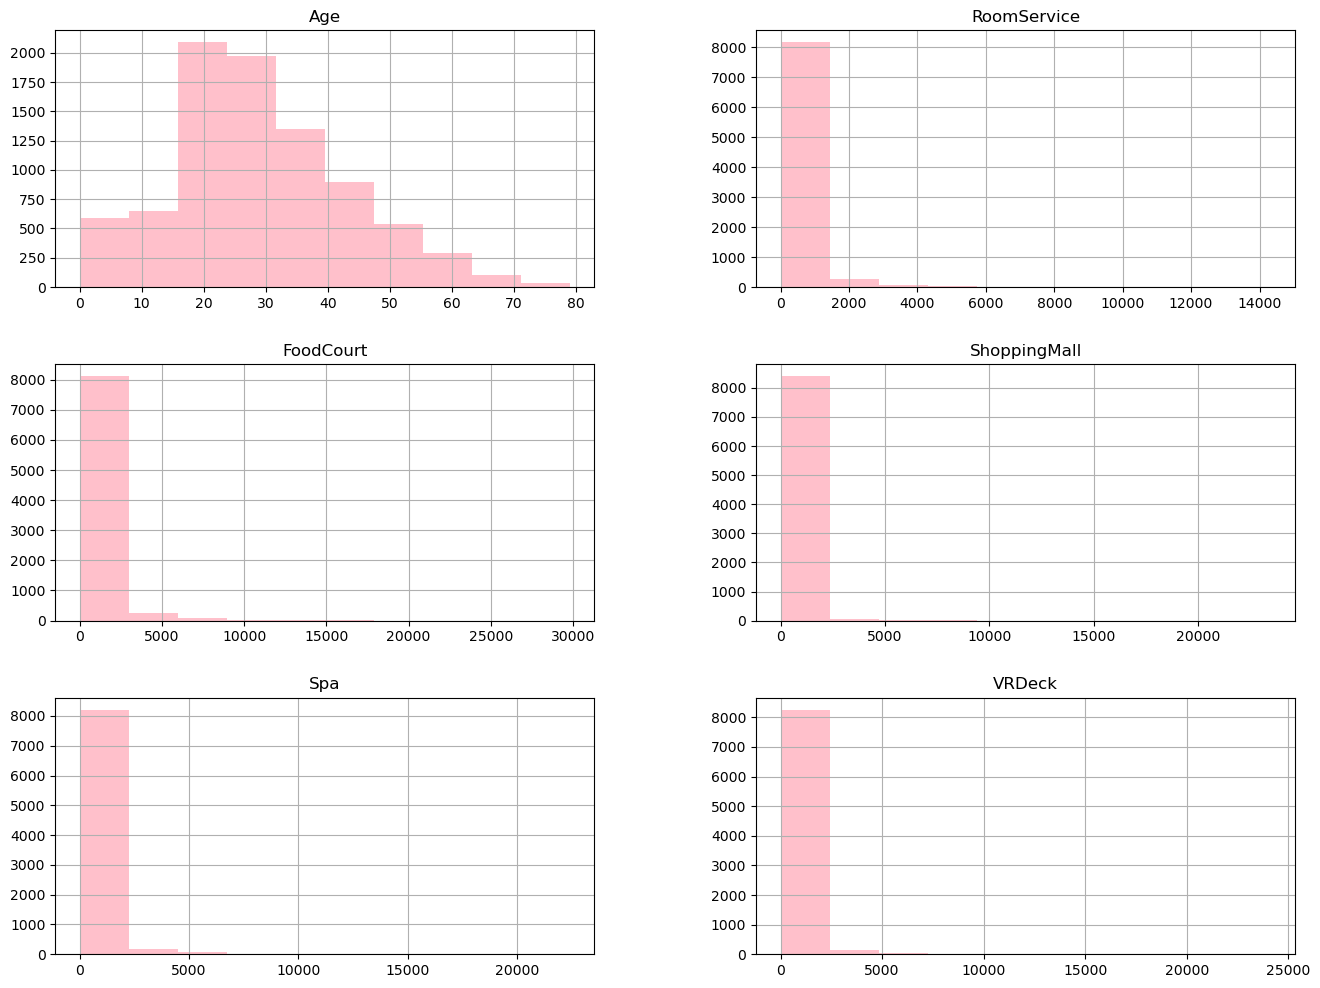

In [10]:
df.hist(color='pink', figsize=(16, 12))
plt.show()

Histogramy danych numerycznych nie mówią nam zbyt wiele, ponieważ istnieją wartości odstające, które zawyżają skalę w osi X. Wyrzucimy je i narusyjemy historgramy ponownie.

array([[<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'Spa'}>],
       [<AxesSubplot:title={'center':'VRDeck'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'RoomService'}>, <AxesSubplot:>]],
      dtype=object)

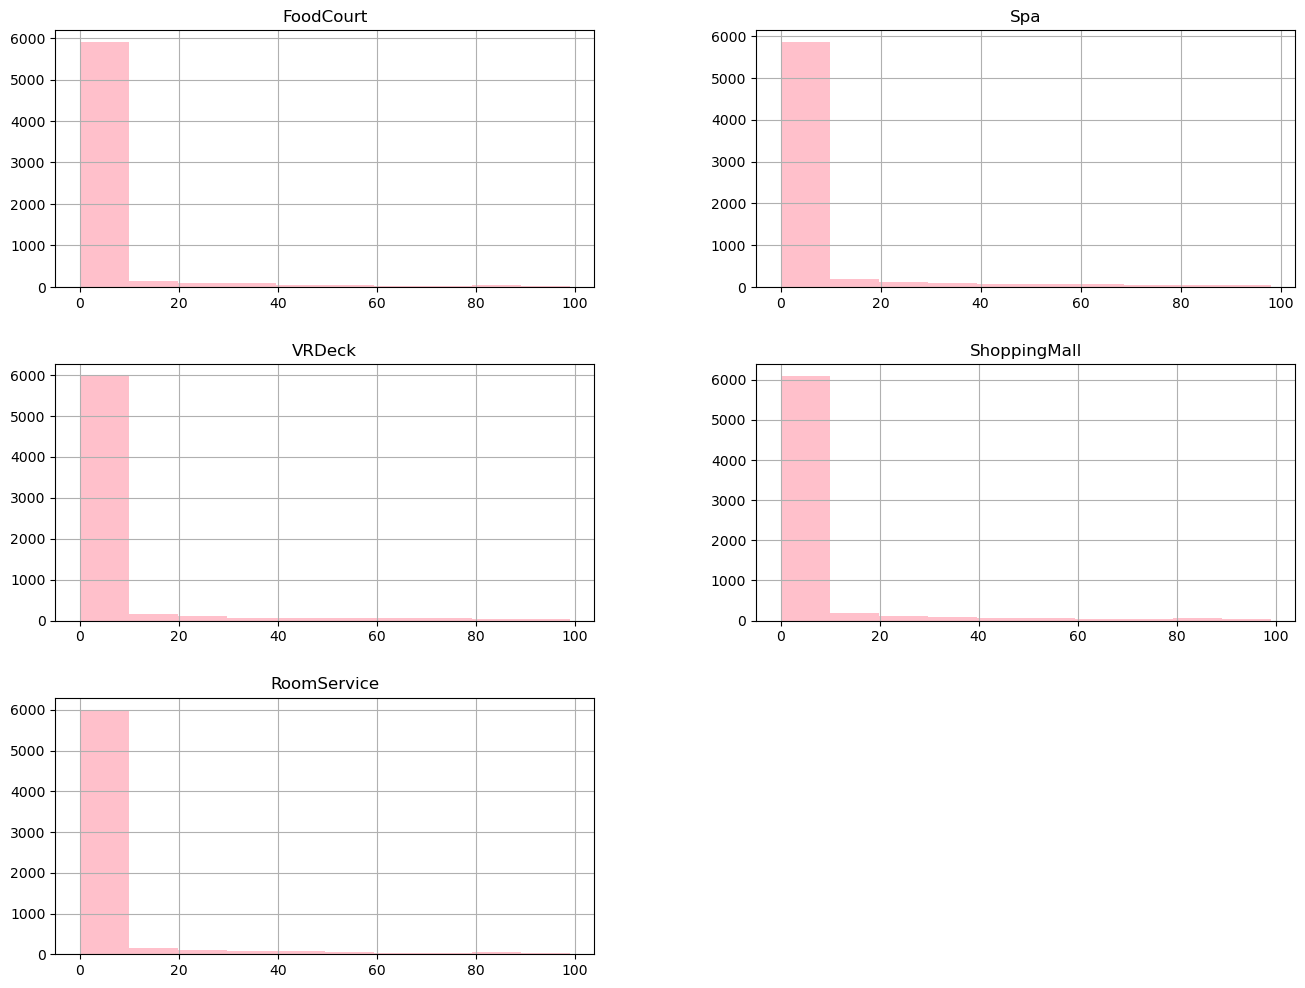

In [18]:
tmp = df[['FoodCourt', 'Spa', 'VRDeck', 'ShoppingMall', 'RoomService']]
tmp[tmp<100].hist(color='pink', figsize=(16, 12))

Histogramy nadal skupione są wokół wartości 0. Wynika z tego, że większość pasażerów nie wydawała na nie pieniędzy.

In [21]:
df['Cabin']

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

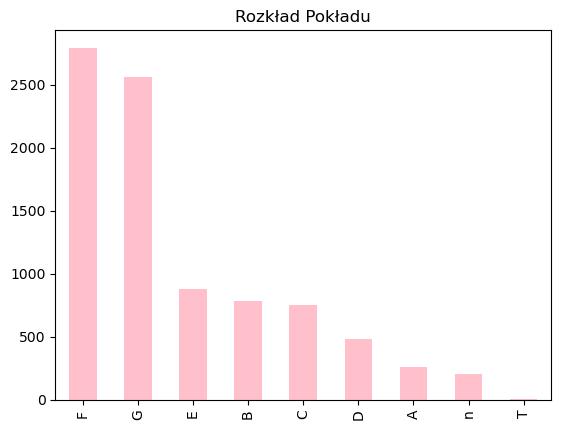

In [26]:
df['Cabin_1'] = df['Cabin'].apply(lambda x: str(x)[0])
df['Cabin_1'].value_counts().plot(kind='bar', color='pink')
plt.title('Rozkład Pokładu')
plt.show()


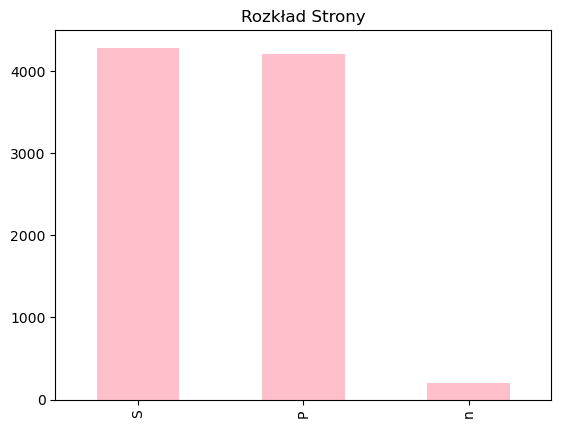

In [27]:
df['Cabin_side'] = df['Cabin'].apply(lambda x: str(x)[-1])
df['Cabin_side'].value_counts().plot(kind='bar', color='pink')
plt.title('Rozkład Strony')
plt.show()


Na statku znajduje się bardzo wiele kabin, więc aby je pogrupować ograniczmy się do pokładu i kabiny.

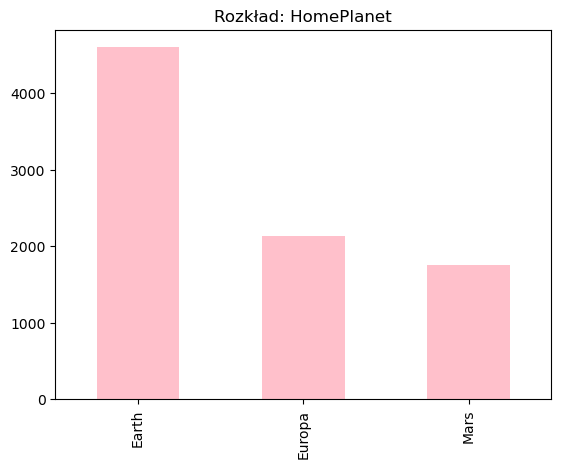

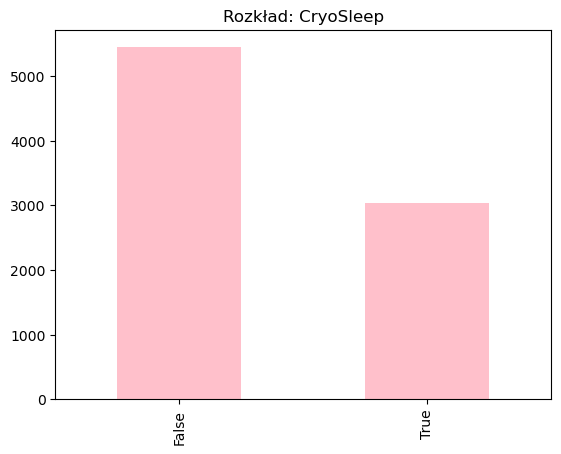

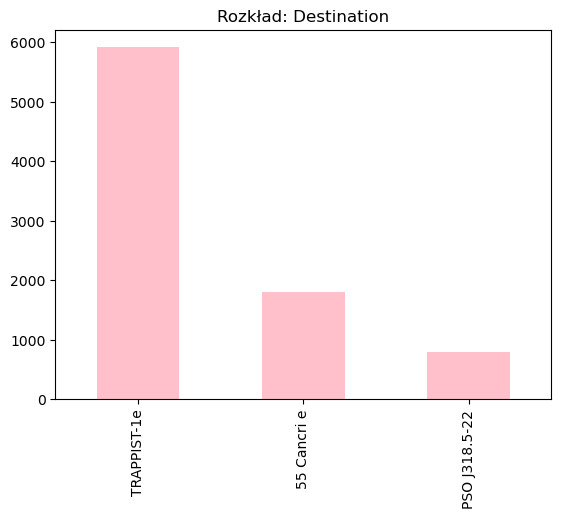

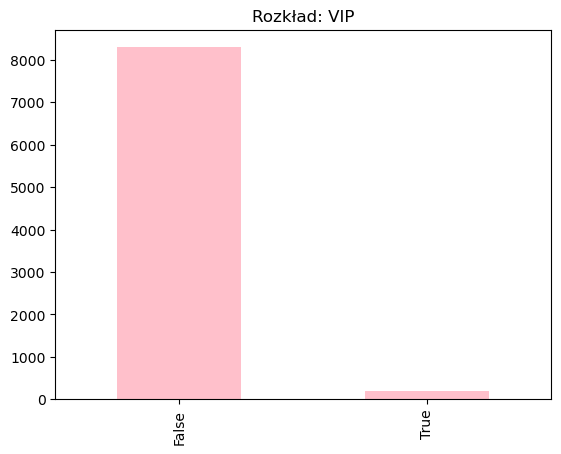

In [30]:
for col in ('HomePlanet', 'CryoSleep', 'Destination', 'VIP'):
    df[col].value_counts().plot(kind='bar', color='pink')
    plt.title('Rozkład: ' + col)
    plt.show()

Wartości dyskretne charakteryzują się już nieco bardziej zróżnicowanym rozkładem. Jedynie kolumna VIP jest zdominowana przez wartość False.

In [34]:
df['Transported_bin'] = df['Transported'].apply(lambda x: int(x))
df['Transported_bin'].value_counts()

1    4378
0    4315
Name: Transported_bin, dtype: int64

Nasz zbiór jest zbalansowany - połowa pasażerów dotarła do celu, a połowa nie.


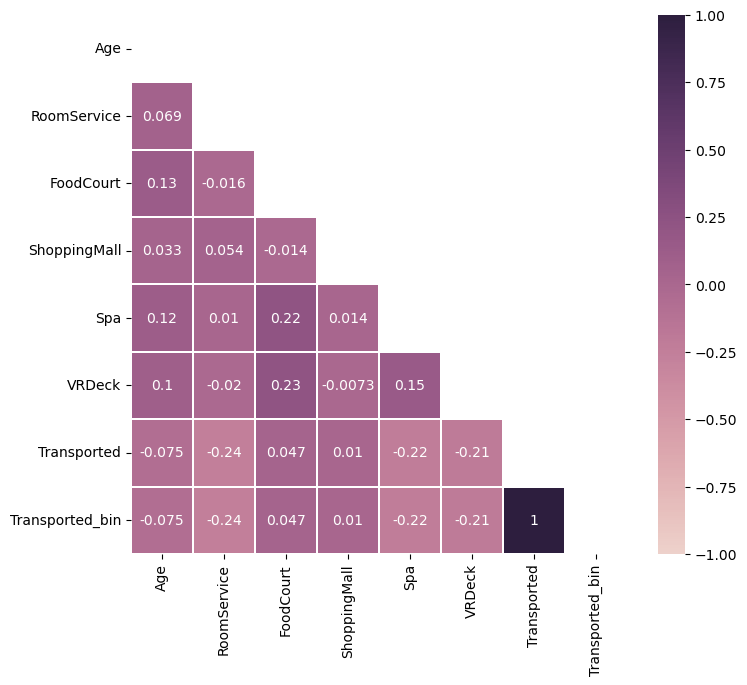

In [35]:
plt.figure(figsize=(8, 7))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    linewidths=.01,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=True,
    mask=mask,
    vmin=-1,
    vmax=1
)

plt.show()


Korelacja liniowa pomiędzy atrybutami numerycznymi jest niestety dość niska. Wynika to prawdopodobnie z faktu, że większość z ich wartości jest równa 0.


### Dalsze kroki

W kolejnym etrapie skupimy się na dokładniejszym przygotowaniu danych do modelowania i przeprowadzimy wspomniane na początku eksperymenty.